# Propensity to buy Term Deposit

# EDA on the Dataset

In [1]:
#Change directory and load catalog and pipeline from Kedro
%cd "D:\University\CST4090 - Thesis\Propensity Model\thesis-propensity-model"
%reload_kedro

D:\University\CST4090 - Thesis\Propensity Model\thesis-propensity-model


[08/17/22 21:25:43] INFO     No path argument was provided. Using: D:\University\CST4090 -            ]8;id=860012;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=964796;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py#55\55]8;;\
                             Thesis\Propensity Model\thesis-propensity-model                                       

[08/17/22 21:25:44] INFO     Kedro project thesis_propensity_model                                    ]8;id=505073;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=809263;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py#78\78]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and 'pipelines'  ]8;id=883752;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=459121;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py#79\79]8;;\

                    INFO     Registered line magic 'reload_kedro_mlflow'                              ]8;id=494917;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=939737;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py#85\85]8;;\

                    INFO     Registered line magic 'run_viz'                                          ]8;id=259052;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=553172;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py#85\85]8;;\

In [2]:
model=catalog.load("xgb_model")

[08/17/22 21:26:08] INFO     Loading data from 'xgb_model' (PickleDataSet)...                   ]8;id=287801;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=644879;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [5]:
model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=80, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [2]:
#Loading packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

[08/14/22 23:15:00] WARNING  C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\seaborn\rcm ]8;id=420342;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\warnings.py\warnings.py]8;;\:]8;id=685027;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\warnings.py#109\109]8;;\
                             od.py:82: DeprecationWarning: distutils Version classes are                           
                             deprecated. Use packaging.version instead.                                            
                               if LooseVersion(mpl.__version__) >= "3.0":                                          
                                                                                                                   

                    WARNING  C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\setuptools\ ]8;id=921295;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\warnings.py\warnings.py]8;;\:]8;id=971988;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\warnings.py#109\109]8;;\
                             _distutils\version.py:351: DeprecationWarning: distutils Version                      
                             classes are deprecated. Use packaging.version instead.                                
                               other = LooseVersion(other)                                                         
                                                                                                                   

In [3]:
#Load the Raw Dataset
bank_raw=catalog.load("bank_raw")

                    INFO     Loading data from 'bank_raw' (CSVDataSet)...                       ]8;id=82266;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=653769;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [4]:
#Check number of columns and rows of dataset
bank_raw.shape

(41188, 21)

In [5]:
#See column names of the dataset
bank_raw.columns.to_list()

[
    'age',
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',
    'y'
]

In [6]:
#Verify top rows of the dataframe
bank_raw.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
#Describe the dataframe and understand the field distribution
bank_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
bank_raw.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
bank_raw.describe(include=["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [10]:
#Check for nulls
bank_raw.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
#Loop through all columns and print unique value counts
for col in bank_raw.columns:
        print(col)
        print(bank_raw[col].value_counts(),end="\n")


age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
housing
yes        21576
no         18622
unknown      990
Name: hou

In [12]:
#Description of the columns
bank_raw.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Demographics

age - client's age in years (numeric)

job - type of job (categorical: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)

marital - marital status (categorical: divorced, married, single, unknown)

education - client's education (categorical: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)


Financial/product Holding

default - has credit in default? (categorical: no, yes, unknown)

housing - has housing loan? (categorical: no, yes, unknown)

loan - has personal loan? (categorical: no, yes, unknown)


Previous campaign details

contact - contact communication type (categorical: cellular, telephone)

month - last contact month of the year (categorical: jan, feb, mar, ..., nov, dec)

day_of_week - last contact day of the week (categorical: mon, tue, wed, thu, fri)

duration - last contact duration, in seconds (numeric).

campaign - number of contacts performed and for this client during this campaign (numeric, includes the last contact)

pdays - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the 
client has not been previously contacted)

previous - number of contacts performed for this client before this campaign (numeric)

poutcome - outcome of the previous marketing campaign (categorical: failure, nonexistent, success)


Indicators

emp.var.rate - employment variation rate, quarterly indicator (numeric)

cons.price.idx - consumer price index, monthly indicator (numeric)

cons.conf.idx - consumer confidence index, monthly indicator (numeric)

euribor3m - euribor 3 month rate, daily indicator (numeric)

nr.employed - number of employees, quarterly indicator (numeric)


Output feature (desired target):

y - has the client subscribed a term deposit? (binary: yes,no)

In [13]:
#Rename the target column and create new encoded column for target
bank_raw.rename(columns={'y':'deposit'},inplace=True)
dict_target = {"no": 0, "yes": 1}
bank_raw["deposit_encoded"] = bank_raw["deposit"].map(dict_target)
bank_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,deposit_encoded
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [14]:
#Print share of customers with term deposit
print("Share of customers with term deposit =", '{:.1%}'.format(bank_raw["deposit_encoded"].mean()))

Share of customers with term deposit = 11.3%


In [15]:
#Count of Customers with and without deposit
bank_raw["deposit"].value_counts()

no     36548
yes     4640
Name: deposit, dtype: int64

From a business perspective, the number of active customers holding deposit is very less which is not good for the bank as liabilities/deposits lead to balance the books. 

From modelling perspective, the target class is imbalanced and needs to be taken care while model training 

In [16]:
bank_raw[bank_raw["deposit_encoded"] == 1].mean() 

age                  40.913147
duration            553.191164
campaign              2.051724
pdays               792.035560
previous              0.492672
emp.var.rate         -1.233448
cons.price.idx       93.354386
cons.conf.idx       -39.789784
euribor3m             2.123135
nr.employed        5095.115991
deposit_encoded       1.000000
dtype: float64

In [17]:
bank_raw[bank_raw["deposit_encoded"] == 0].mean() 

age                  39.911185
duration            220.844807
campaign              2.633085
pdays               984.113878
previous              0.132374
emp.var.rate          0.248875
cons.price.idx       93.603757
cons.conf.idx       -40.593097
euribor3m             3.811491
nr.employed        5176.166600
deposit_encoded       0.000000
dtype: float64

# Data Visualization

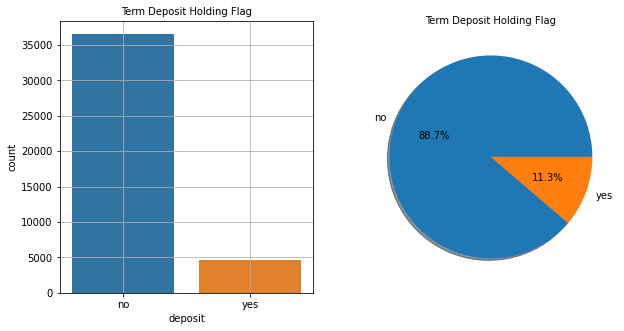

In [18]:
#Target Product Holding Visualization
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='deposit',data=bank_raw)
plt.title("Term Deposit Holding Flag",size = 10)
plt.grid()
plt.subplot(1,2,2)
labels =bank_raw['deposit'].value_counts(sort = True).index
sizes = bank_raw['deposit'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Term Deposit Holding Flag',size = 10)
plt.show()

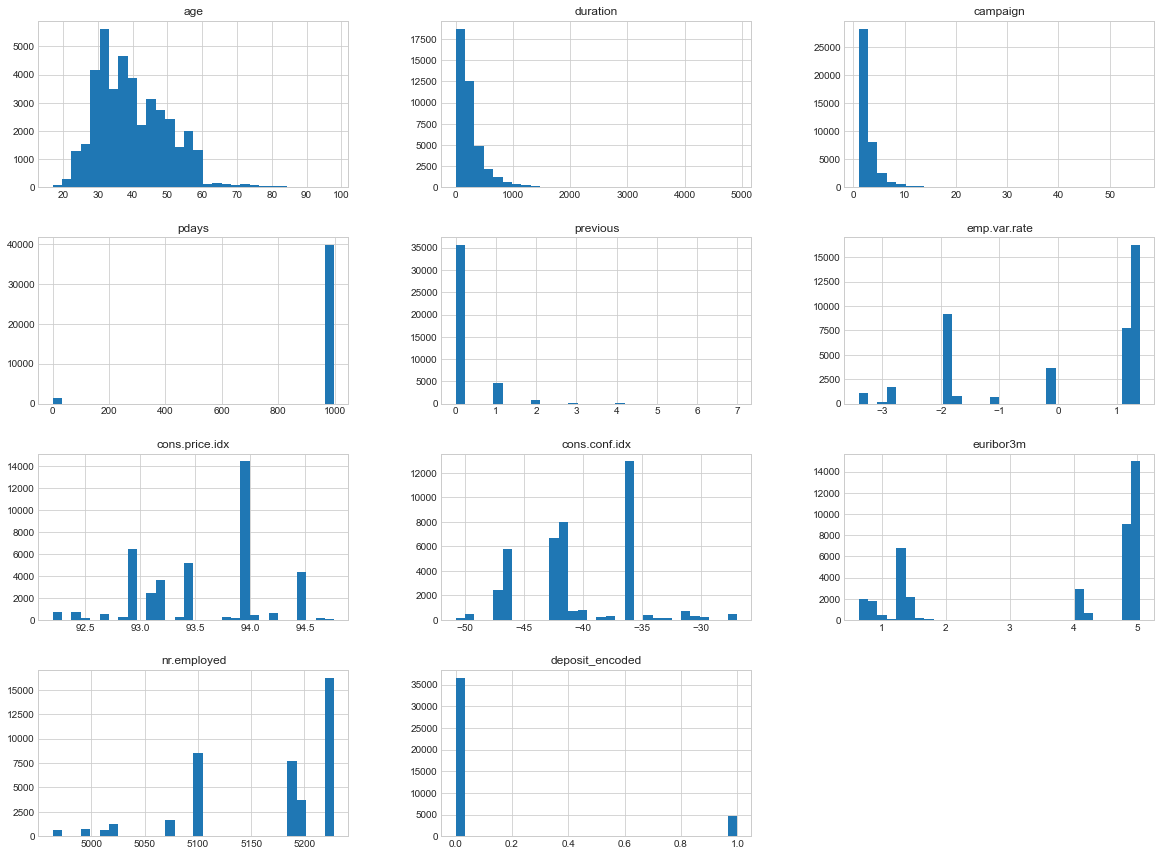

In [19]:
plt.style.use('seaborn-whitegrid')

bank_raw.hist(bins=30, figsize=(20,15))
plt.show()

In [20]:
#Plot Numerical features and categorical as boxplot and countplot

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorics=['object']

bank_raw_cat = bank_raw.select_dtypes(include=categorics)
bank_raw_num = pd.concat([bank_raw.select_dtypes(include=numerics),bank_raw[['deposit']]],axis=1)

bank_raw_num_columns=bank_raw.select_dtypes(include=numerics)

print(bank_raw_cat.columns)
print(bank_raw_num.columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'deposit_encoded', 'deposit'],
      dtype='object')


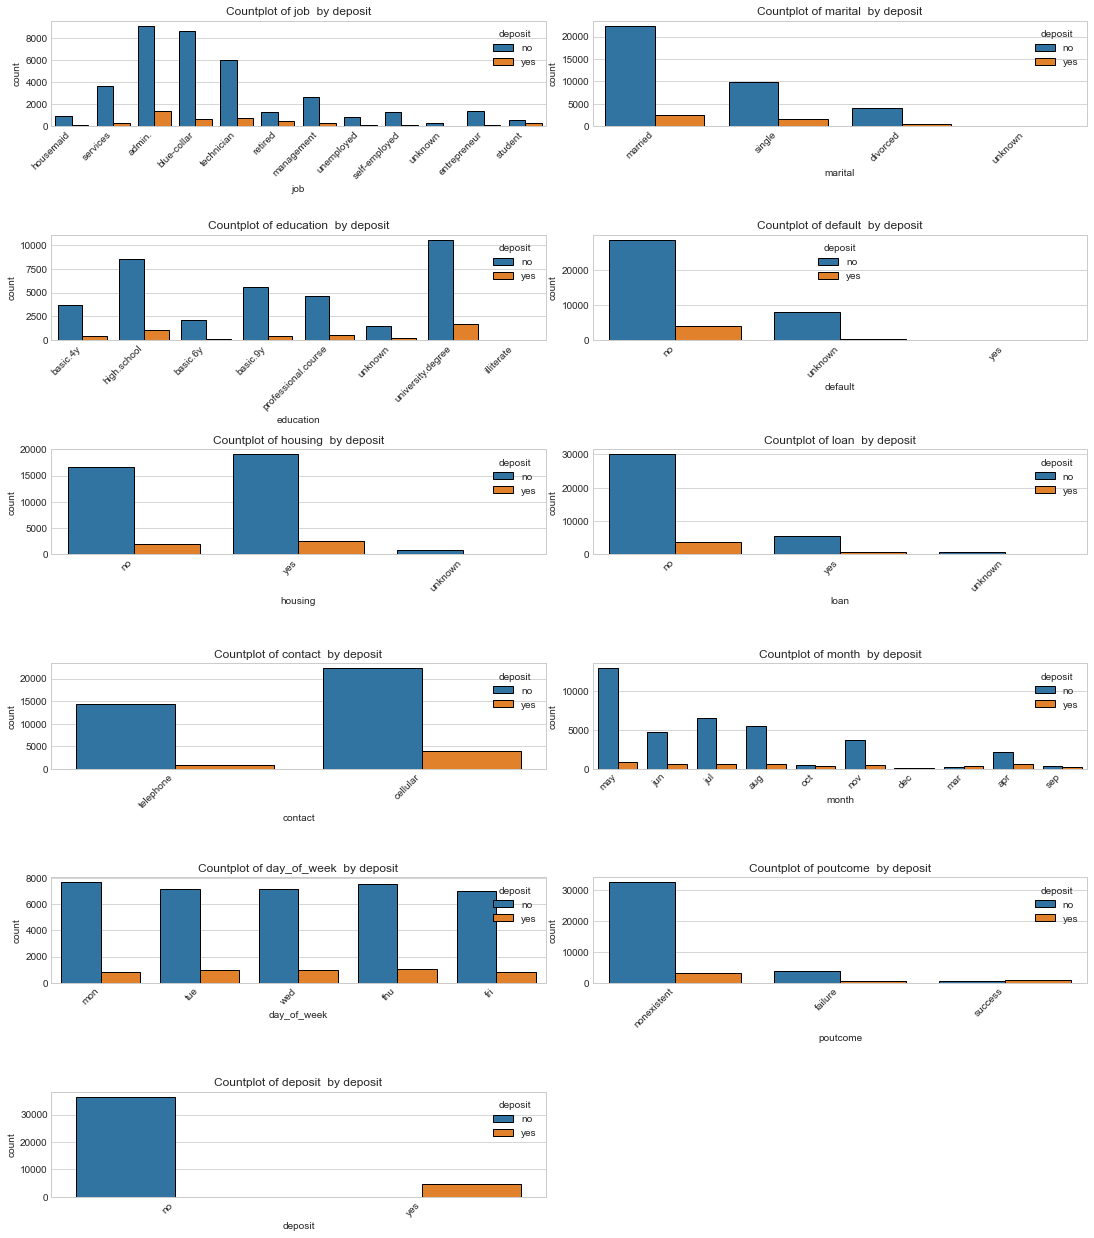

In [21]:
#Plot categorical features
plt.figure(figsize=(15,17))
for i,cat_fea in enumerate(bank_raw_cat):
    plt.subplot(6,2,i+1)
    chart=sns.countplot(x=cat_fea,hue='deposit',data=bank_raw_cat,edgecolor="black")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title("Countplot of {}  by deposit".format(cat_fea))
plt.tight_layout(pad=0., w_pad=0.3, h_pad=1.0)    
plt.show()

The Imbalanced nature of term deposit holding makes it difficult to get insights from the countplot, lets understand how boxplot is able to segregate feature for the target variable

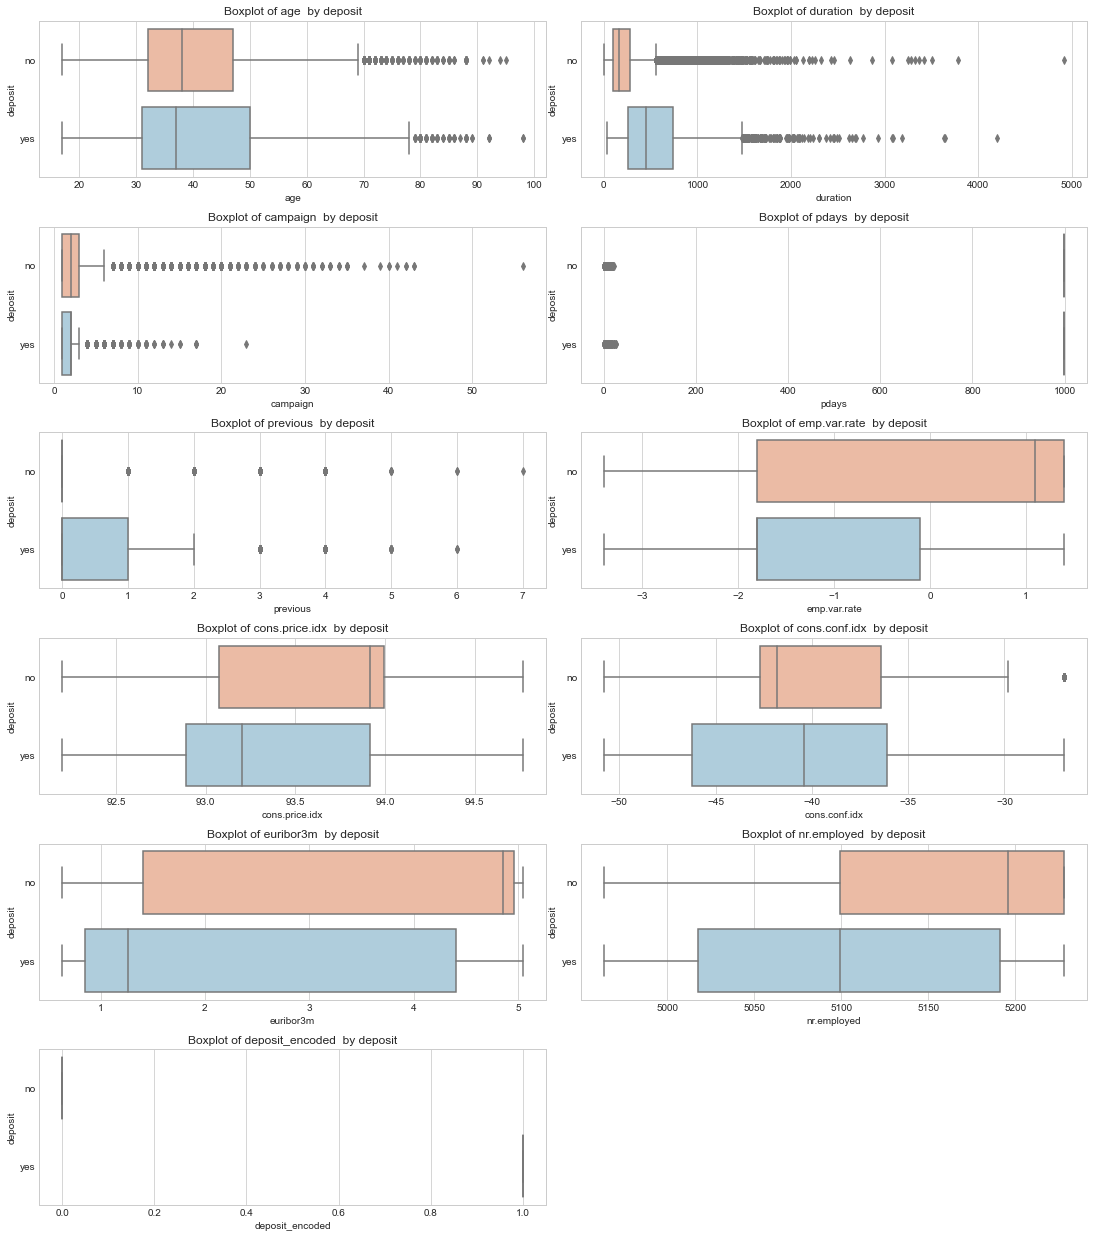

In [22]:
#Plot Numerical features
plt.figure(figsize=(15,17))
for i,num_fea in enumerate(bank_raw_num_columns):
    plt.subplot(6,2,i+1)
    chart=sns.boxplot(x=num_fea,y='deposit',data=bank_raw_num,palette="RdBu")
    plt.title("Boxplot of {}  by deposit".format(num_fea))
plt.tight_layout(pad=0., w_pad=0.3, h_pad=1.0)    
plt.show()

We see the duration and previous contact to customer has definitely led to more suscriptions to product

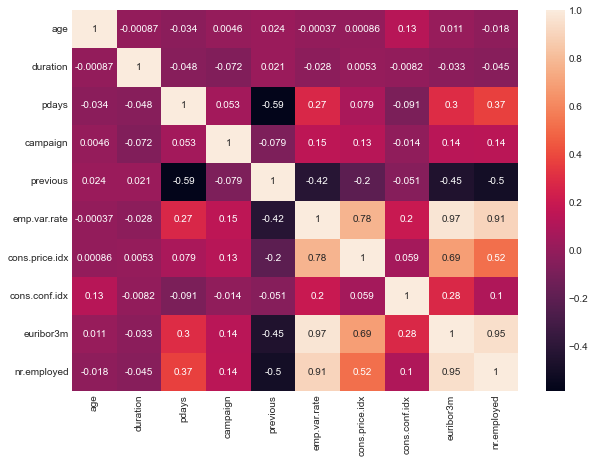

In [23]:
#Correlation Heatmap
bank_raw_df = bank_raw[['age', 'duration', 'pdays', 'campaign', 'previous','emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
plt.figure(figsize=(10,7))
sns.heatmap(data=bank_raw_df.corr(), annot=True)
plt.show()

the feature "previous" seems to have have high correlation with pdays and all the economic indicators have high correlation to each other and may lead to multicollinearity issue.

In [24]:
checkdf=bank_raw[['pdays','previous']]

In [25]:
checkdf.pivot_table(index='pdays', columns='previous', 
                        aggfunc=len, fill_value=0)

previous,0,1,2,3,4,5,6,7
pdays,,,,,,,,
0,0,7,4,2,1,1,0,0
1,0,16,5,3,1,0,1,0
2,0,42,12,3,3,1,0,0
3,0,250,114,43,19,9,3,1
4,0,73,29,14,2,0,0,0
5,0,28,11,5,0,2,0,0
6,0,220,117,57,16,2,0,0
7,0,26,23,8,3,0,0,0
8,0,9,6,2,1,0,0,0


The correlation is due to 34521 customers not contacted so comes in pdays(999) and previous contact 0. So pdays can be removed as previous is a stronger feature.

# Preprocessing Data

In [26]:
#Duration and campaign has most outliers and needs to be treated

#Duration 1500 based on boxplot and campaign of 10

bank_int=bank_raw[~(bank_raw['campaign']>10)]
bank_int=bank_int[~(bank_int['duration']>1500)]



# cols = ['duration','campaign'] 

# # Calculate quantiles and IQR
# Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
# Q3 = df[cols].quantile(0.75)
# IQR = Q3 - Q1

# # Return a boolean array of the rows with (any) non-outlier column values
# condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# # Filter our dataframe based on condition
# filtered_df = df[condition]

In [27]:
#Drop pdays and the encoded deposit
bank_int = bank_int.drop(columns=['pdays', 'deposit_encoded'])

In [28]:
bank_int.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [29]:
bank_int.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Imputation of data

In [30]:
#Education, default, marital, housing and loan have unknown in them
#education, 4% unknown and no clear major value, so knn imputation
#default, also mode as predominantly (80%) is no
#marital represent 0.2% and can be replaced by mode (married)
#Housing,knn imputation
#Loan,mode (no)


bank_int[['education','default','marital','housing','loan']] = bank_int[['education','default','marital','housing','loan']].replace('unknown', np.nan)


In [31]:
#Check nan
bank_int['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', nan, 'university.degree', 'illiterate'],
      dtype=object)

In [32]:
#Mode imputation
mode_col=['default','marital','loan','education','housing']
for col in mode_col:
    bank_int[col] = bank_int[col].fillna(bank_int[col].mode()[0])

In [33]:
bank_int['loan'].value_counts()

no     34036
yes     6080
Name: loan, dtype: int64

In [34]:
# # Knn imputation
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=15)

# imputed = imputer.fit_transform(bank_int_cp['education'])
# # df_imputed = pd.DataFrame(imputed, columns=df.columns)


Taking care of Collinear features (Economic Indicators)

In [35]:
bank_int["Economic_Indicators"]=FactorAnalysis(n_components=1).fit_transform(bank_int[['emp.var.rate',
                                                                                      'cons.price.idx',
                                                                                      'euribor3m','nr.employed']])

In [36]:
bank_int=bank_int.drop(['emp.var.rate','cons.price.idx','euribor3m','nr.employed'],axis=1)

In [37]:
bank_int.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.conf.idx,deposit,Economic_Indicators
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,-36.4,no,-0.72125
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,0,nonexistent,-36.4,no,-0.72125
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,-36.4,no,-0.72125
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,-36.4,no,-0.72125
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,-36.4,no,-0.72125
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,198,1,0,nonexistent,-36.4,no,-0.72125
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,0,nonexistent,-36.4,no,-0.72125
7,41,blue-collar,married,university.degree,no,no,no,telephone,may,mon,217,1,0,nonexistent,-36.4,no,-0.72125
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,0,nonexistent,-36.4,no,-0.72125
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,0,nonexistent,-36.4,no,-0.72125


In [38]:
bank_int.shape

(40116, 17)

In [39]:
#Remove duplicates

bank_int=bank_int.drop_duplicates()
bank_int.shape

(40102, 17)

In [40]:
bank_int.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.conf.idx,deposit,Economic_Indicators
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,-36.4,no,-0.72125
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,0,nonexistent,-36.4,no,-0.72125
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,-36.4,no,-0.72125
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,-36.4,no,-0.72125
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,-36.4,no,-0.72125
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,198,1,0,nonexistent,-36.4,no,-0.72125
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,0,nonexistent,-36.4,no,-0.72125
7,41,blue-collar,married,university.degree,no,no,no,telephone,may,mon,217,1,0,nonexistent,-36.4,no,-0.72125
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,0,nonexistent,-36.4,no,-0.72125
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,0,nonexistent,-36.4,no,-0.72125


In [41]:
from sklearn.preprocessing import LabelEncoder
#create dict for binary encoding
dic = {"yes":1,"no":0}
lst = ["deposit","loan","default","housing"]
for i in lst:
    bank_int[i] = bank_int[i].map(dic)

In [42]:
# Ordinal Encoding
l=['month',"day_of_week","contact","poutcome"]
le=LabelEncoder()
for i in l:
    bank_int[i]=le.fit_transform(bank_int[i].values)

In [43]:
# OneHot Encoding 
bank_int = pd.get_dummies(bank_int, columns = ['job','marital','education'])

In [44]:
bank_int.head(10)

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,...,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,56,0,0,0,1,6,1,261,1,0,...,0,1,0,1,0,0,0,0,0,0
1,57,0,0,0,1,6,1,149,1,0,...,0,1,0,0,0,0,1,0,0,0
2,37,0,1,0,1,6,1,226,1,0,...,0,1,0,0,0,0,1,0,0,0
3,40,0,0,0,1,6,1,151,1,0,...,0,1,0,0,1,0,0,0,0,0
4,56,0,0,1,1,6,1,307,1,0,...,0,1,0,0,0,0,1,0,0,0
5,45,0,0,0,1,6,1,198,1,0,...,0,1,0,0,0,1,0,0,0,0
6,59,0,0,0,1,6,1,139,1,0,...,0,1,0,0,0,0,0,0,1,0
7,41,0,0,0,1,6,1,217,1,0,...,0,1,0,0,0,0,0,0,0,1
8,24,0,1,0,1,6,1,380,1,0,...,0,0,1,0,0,0,0,0,1,0
9,25,0,1,0,1,6,1,50,1,0,...,0,0,1,0,0,0,1,0,0,0


In [45]:
bank_int=bank_int.reset_index()

In [46]:
bank_int.drop('index',axis=1,inplace=True)

In [47]:
bank_int

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,...,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,56,0,0,0,1,6,1,261,1,0,...,0,1,0,1,0,0,0,0,0,0
1,57,0,0,0,1,6,1,149,1,0,...,0,1,0,0,0,0,1,0,0,0
2,37,0,1,0,1,6,1,226,1,0,...,0,1,0,0,0,0,1,0,0,0
3,40,0,0,0,1,6,1,151,1,0,...,0,1,0,0,1,0,0,0,0,0
4,56,0,0,1,1,6,1,307,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40097,73,0,1,0,0,7,0,334,1,0,...,0,1,0,0,0,0,0,0,1,0
40098,46,0,0,0,0,7,0,383,1,0,...,0,1,0,0,0,0,0,0,1,0
40099,56,0,1,0,0,7,0,189,2,0,...,0,1,0,0,0,0,0,0,0,1
40100,44,0,0,0,0,7,0,442,1,0,...,0,1,0,0,0,0,0,0,1,0


In [48]:
bank_int['deposit'].value_counts()

0    35618
1     4484
Name: deposit, dtype: int64

In [49]:
X=bank_int.drop('deposit',axis=1)
Y=bank_int['deposit']

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [51]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=1)
for train_index,test_index in sss.split(X,Y):
    train_df = bank_int.loc[train_index]
    test_df = bank_int.loc[test_index]

In [52]:
print("Ratio for train dataset")
print(train_df['deposit'].value_counts()/train_df.shape[0])
print()
print("ratio for test dataset")
print(test_df['deposit'].value_counts()/test_df.shape[0])

Ratio for train dataset
0    0.888176
1    0.111824
Name: deposit, dtype: float64

ratio for test dataset
0    0.888205
1    0.111795
Name: deposit, dtype: float64


In [53]:
X_train = train_df.drop("deposit",axis=1)
Y_train = train_df['deposit']

X_test = test_df.drop("deposit",axis=1)
Y_test = test_df['deposit']

In [78]:
X_train.

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,...,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
16128,24,0,0,0,0,3,4,74,5,0,...,0,0,1,0,0,0,1,0,0,0
17955,30,0,1,0,0,3,2,272,2,0,...,0,1,0,0,0,0,1,0,0,0
5400,48,0,1,0,1,6,1,136,2,0,...,1,0,0,0,0,0,0,0,1,0
22518,56,0,0,0,0,1,4,168,2,0,...,1,0,0,0,0,0,0,0,0,1
33910,25,0,0,0,0,6,0,72,2,1,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36948,35,0,0,0,0,9,3,421,2,1,...,0,1,0,0,0,0,1,0,0,0
22816,32,0,1,0,0,1,2,245,1,0,...,0,0,1,0,0,0,0,0,0,1
37819,63,0,1,0,0,7,3,408,3,0,...,0,1,0,1,0,0,0,0,0,0
4201,58,0,1,0,1,6,3,38,1,0,...,0,1,0,0,0,0,0,0,0,1


In [54]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

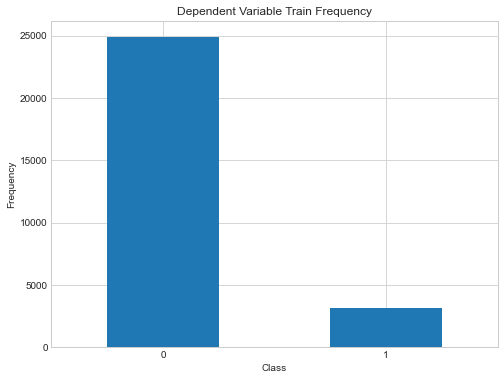

In [55]:
#Lets check the balance of the Target variable dataset (Whether the class have similar representation)
count_classes=pd.value_counts(Y_train,sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('Dependent Variable Train Frequency')
plt.xlabel("Class")
plt.ylabel("Frequency")

In [83]:
#Balance Train dataset
import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train, Y_train)

In [57]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [87]:
#Logistic Regression
lr= LogisticRegression()

lr.fit(X_smote,Y_smote)
Y_pred_lr = lr.predict(X_test)

print("Testing Accuracy of LogisticRegression : ",metrics.accuracy_score(Y_test,Y_pred_lr))
#print("Accuracy of LogisticRegression",pipe_lr.score(X_test,Y_test))

print("Training Accuracy of LogisticRegression : ",lr.score(X_train_s,Y_train))

Testing Accuracy of LogisticRegression :  0.8666777491480342
Training Accuracy of LogisticRegression :  0.5480032774037262


In [59]:
print(classification_report(Y_test,Y_pred_lr))
print(confusion_matrix(Y_test,Y_pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10686
           1       0.42      0.87      0.57      1345

    accuracy                           0.85     12031
   macro avg       0.70      0.86      0.74     12031
weighted avg       0.92      0.85      0.87     12031

[[9093 1593]
 [ 172 1173]]


In [60]:
#Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=5)

gb.fit(X_smote,Y_smote)
y_train_preds = gb.predict(X_smote)
y_test_preds = gb.predict(X_test_s)

print('The accuracy of the GB is',metrics.accuracy_score(Y_test,y_test_preds))
print('The accuracy of the GB is',metrics.accuracy_score(y_train_preds,Y_smote))

The accuracy of the GB is 0.9000914304712825
The accuracy of the GB is 0.936427081662121


In [61]:
print(classification_report(Y_test,y_test_preds))
print(confusion_matrix(Y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     10686
           1       0.54      0.78      0.64      1345

    accuracy                           0.90     12031
   macro avg       0.75      0.85      0.79     12031
weighted avg       0.92      0.90      0.91     12031

[[9779  907]
 [ 295 1050]]


In [85]:
import xgboost 
xgb = xgboost.XGBClassifier(n_estimators=80, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=5)
xgb.fit(X_smote,Y_smote)

#calculate and print scores for the model
y_train_preds = xgb.predict(X_smote)
y_test_preds = xgb.predict(X_test)


print('The accuracy of the GB is',metrics.accuracy_score(Y_test,y_test_preds))
print('The accuracy of the GB is',metrics.accuracy_score(y_train_preds,Y_smote))

The accuracy of the GB is 0.9106474939739008
The accuracy of the GB is 0.9521699021338039


In [63]:
print(classification_report(Y_test,y_test_preds))
print(confusion_matrix(Y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     10686
           1       0.58      0.73      0.65      1345

    accuracy                           0.91     12031
   macro avg       0.77      0.83      0.80     12031
weighted avg       0.92      0.91      0.92     12031

[[9986  700]
 [ 362  983]]


In [64]:
y_test_proba = xgb.predict_proba(X_test_s)

In [77]:
len(X_test_s[0])

35

In [65]:
len(y_test_proba)

12031

In [66]:
Y_test.value_counts()

0    10686
1     1345
Name: deposit, dtype: int64

In [79]:
X_columns=list(X_train.columns)

In [81]:
X_header=pd.DataFrame(X_test_s,columns=X_columns)

In [67]:
#Explanation

In [68]:
import shap

In [86]:
# Fits the explainer
explainer = shap.Explainer(xgb.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 12032it [09:59, 19.61it/s]                                                                                                   


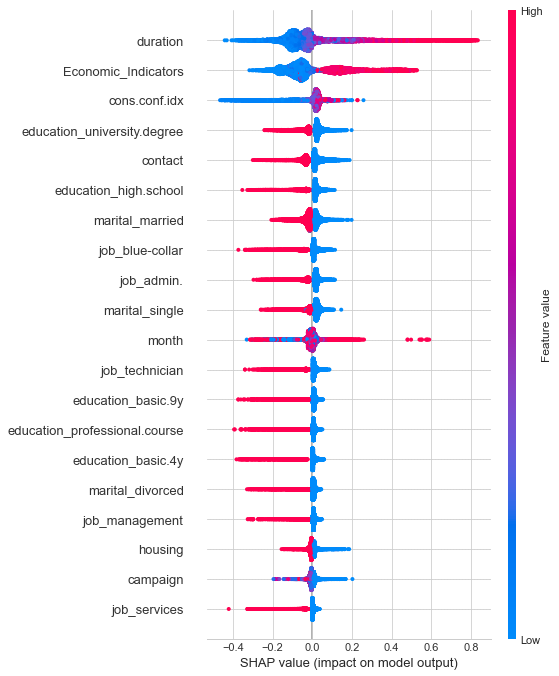

In [88]:
shap.summary_plot(shap_values)

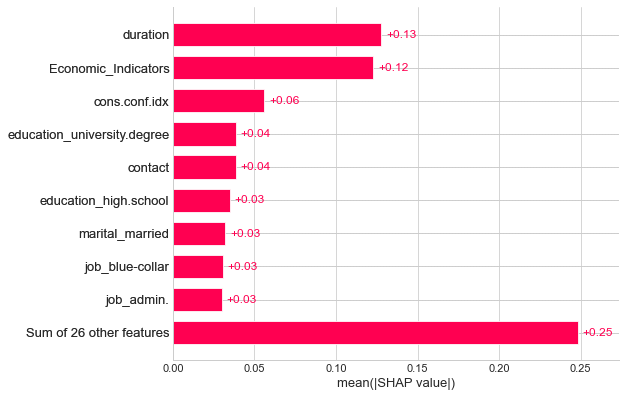

In [89]:
shap.plots.bar(shap_values)

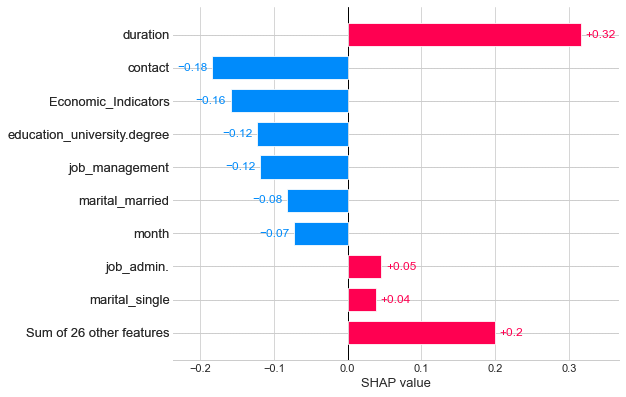

In [90]:
shap.plots.bar(shap_values[0])

In [91]:
shap_values[0]

.values =
array([ 0.00571429,  0.        ,  0.02357143, -0.015     , -0.18428571,
       -0.07214286, -0.015     ,  0.31571429, -0.02071429,  0.        ,
       -0.00071429,  0.03571429, -0.15857143,  0.04571429,  0.035     ,
        0.00571429,  0.00428571, -0.11857143,  0.00357143,  0.00642857,
        0.00142857,  0.00071429,  0.02785714,  0.00357143,  0.        ,
        0.01642857, -0.08214286,  0.03785714,  0.02571429,  0.00214286,
        0.02071429,  0.02571429,  0.        ,  0.00642857, -0.12285714])

.base_values =
0.14

.data =
array([ 35.        ,   0.        ,   0.        ,   1.        ,
         1.        ,   6.        ,   4.        , 717.        ,
         3.        ,   0.        ,   1.        , -36.4       ,
        -0.72181452,   0.        ,   0.        ,   0.        ,
         0.        ,   1.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   1.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   1.        ])